In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
from math import factorial
from scipy.ndimage import rotate

# Создаем директорию для хранения датасета
dataset_dir = 'DataSet'
if not os.path.exists(dataset_dir):
    os.makedirs(dataset_dir)

# Вспомогательная функция для вычисления радиальной части полиномов Цернике
def R(n, m, r):
    """Функция для расчета радиальной части полинома Цернике"""
    if (n - m) % 2 != 0:
        return np.zeros_like(r)  # Если разность нечетная, результат 0

    radial_sum = np.zeros_like(r)
    for k in range((n - m) // 2 + 1):
        c = (-1) ** k * factorial(n - k) / (factorial(k) * factorial((n + m) // 2 - k) * factorial((n - m) // 2 - k))
        radial_sum += c * r ** (n - 2 * k)
    return radial_sum

# Основная функция для вычисления полиномов Цернике
def zernike_polynomial(n, m, rho, theta):
    """Вычисление полинома Цернике"""
    if m >= 0:
        return R(n, m, rho) * np.cos(m * theta)
    else:
        return R(n, -m, rho) * np.sin(-m * theta)

def noise(img, p):
  rows, cols = img.shape
  noise = (np.random.rand(rows, cols) < p) * np.random.rand(rows, cols) * np.max(img)
  return img + noise 

# Функция для создания аугментаций изображений
def augment_image(img, count):
    augmented_images = []
    for i in range(count):
        # Применение различных аугментаций
        rotated_img = rotate(img, angle=np.random.randint(0, 360), reshape=False)
        noise_img = noise(rotated_img, 0.08)
        # noise_img = rotated_img + np.random.normal(0, np.random.uniform(0, 1), rotated_img.shape)        
        augmented_images.extend([rotated_img, noise_img])
    return augmented_images

# Функция для генерации и сохранения изображений
def generate_images(n, m, a_range, class_name, grid_size=100, num_augmentations=20):
    y, x = np.linspace(-1, 1, grid_size), np.linspace(-1, 1, grid_size)
    X, Y = np.meshgrid(x, y)
    rho = np.sqrt(X**2 + Y**2)
    theta = np.arctan2(Y, X)
    
    # Ограничиваем область единичным кругом
    mask = rho <= 1
    rho[~mask] = 0
    theta[~mask] = 0
    
    class_dir = os.path.join(dataset_dir, class_name)
    if not os.path.exists(class_dir):
        os.makedirs(class_dir)
    
    image_counter = 0
    b = 0
    for a in a_range:
        # Генерация полинома Цернике
        Z = zernike_polynomial(n, m, rho, theta)
        Z1 = np.exp(1j * a * Z)
        Z1a = np.exp(1j * (a * Z + b * np.sqrt(X ** 2 + Y ** 2)))

        Z1f = np.fft.fftshift(np.fft.fft2(Z1, s=[1000, 1000]))
        Z1af = np.fft.fftshift(np.fft.fft2(Z1a, s=[1000, 1000]))
        
        # Фаза полинома Цернике
        phase_img = abs(Z1f)
        aberration_img = abs(Z1af)
        
        # Сохранение изображений
        plt.imsave(os.path.join(class_dir, f'zernike_phase_n{n}_m{m}_a{a:.2f}_b{b:.2f}.png'), phase_img, cmap='gray')
        plt.imsave(os.path.join(class_dir, f'zernike_aberration_n{n}_m{m}_a{a:.2f}_b{b:.2f}.png'), aberration_img, cmap='gray')
        
        # Применение аугментаций и сохранение
        phase_augmentations = augment_image(phase_img, num_augmentations)
        aberration_augmentations = augment_image(aberration_img, num_augmentations)
        
        for i, aug_img in enumerate(phase_augmentations):
            plt.imsave(os.path.join(class_dir, f'zernike_phase_n{n}_m{m}_a{a:.2f}_b{b:.2f}_aug{i}.png'), aug_img, cmap='gray')
        
        for i, aug_img in enumerate(aberration_augmentations):
            plt.imsave(os.path.join(class_dir, f'zernike_aberration_n{n}_m{m}_a{a:.2f}_b{b:.2f}_aug{i}.png'), aug_img, cmap='gray')
                
        image_counter += 1
        if image_counter % 100 == 0:
            print(f'{image_counter} изображений сгенерировано')

# Параметры для генерации
aberration_classes = [
    (2, 2, 'class1'),
    (3, 1, 'class2'),
    (3, 3, 'class3'),
    (4, 2, 'class4'),
    (4, 4, 'class5'),
    (5, 1, 'class6'),
    (5, 3, 'class7'),
    (5, 5, 'class8'),
]
a_range_large = np.linspace(1, 20, 20)  # Амплитуда a

# Генерация изображений для каждого класса
for n, m, class_name in aberration_classes:
    generate_images(n, m, a_range_large, class_name)


KeyboardInterrupt: 

In [10]:
%pip install scipy

Defaulting to user installation because normal site-packages is not writeable
  Using cached scipy-1.14.1-cp312-cp312-win_amd64.whl.metadata (60 kB)
Using cached scipy-1.14.1-cp312-cp312-win_amd64.whl (44.5 MB)
Note: you may need to restart the kernel to use updated packages.


0 [[7.77880667e-31 2.53086185e-16 4.82568363e-16 ... 5.79549808e-16
  3.79570924e-16 8.29026441e+03]
 [3.55879090e+03 9.54924453e-02 1.81640114e-01 ... 2.50012337e-01
  1.81640114e-01 9.54924453e-02]
 [4.90348301e-16 1.81640114e-01 3.45505143e-01 ... 4.75558766e-01
  3.45505143e-01 1.81640114e-01]
 ...
 [6.74923189e-16 2.50012337e-01 8.31595862e+03 ... 6.54566638e-01
  4.75558766e-01 2.50012337e-01]
 [4.90348301e-16 1.81640114e-01 3.45505143e-01 ... 4.75558766e-01
  3.45505143e-01 1.81640114e-01]
 [2.57787541e-16 9.54924453e-02 1.22368234e+03 ... 8.15564361e+03
  8.94698179e+03 1.77660234e+03]]
1 [[7.77880667e-31 2.53086185e-16 4.82568363e-16 ... 5.79549808e-16
  3.79570924e-16 4.36929914e-16]
 [2.57787541e-16 9.54924453e-02 1.81640114e-01 ... 2.50012337e-01
  1.81640114e-01 9.54924453e-02]
 [4.90348301e-16 1.99865471e+03 3.45505143e-01 ... 4.75558766e-01
  3.45505143e-01 1.81640114e-01]
 ...
 [6.74923189e-16 2.50012337e-01 4.75558766e-01 ... 6.54566638e-01
  4.75558766e-01 2.50012337e

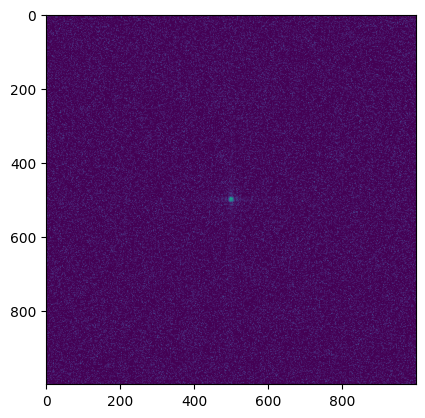

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import os
from math import factorial
from scipy.ndimage import rotate

# Создаем директорию для хранения датасета
dataset_dir = 'DataSet'
if not os.path.exists(dataset_dir):
    os.makedirs(dataset_dir)

# Вспомогательная функция для вычисления радиальной части полиномов Цернике
def R(n, m, r):
    """Функция для расчета радиальной части полинома Цернике"""
    if (n - m) % 2 != 0:
        return np.zeros_like(r)  # Если разность нечетная, результат 0

    radial_sum = np.zeros_like(r)
    for k in range((n - m) // 2 + 1):
        c = (-1) ** k * factorial(n - k) / (factorial(k) * factorial((n + m) // 2 - k) * factorial((n - m) // 2 - k))
        radial_sum += c * r ** (n - 2 * k)
    return radial_sum

# Основная функция для вычисления полиномов Цернике
def zernike_polynomial(n, m, rho, theta):
    """Вычисление полинома Цернике"""
    if m >= 0:
        return R(n, m, rho) * np.cos(m * theta)
    else:
        return R(n, -m, rho) * np.sin(-m * theta)

# def noise(img):
#       row,col= img.shape
#       gauss = np.random.normal(np.mean(img),np.max(img),(row,col))
#       gauss = gauss.reshape(row,col)
#       noisy = img + gauss
#       return noisy

def noise(img, p):
  rows, cols = img.shape
  #переполенние fix
  noise = (np.random.rand(rows, cols) < p) * np.random.rand(rows, cols) * np.max(img)
  return img + noise #типо ограничили


# Функция для создания аугментаций изображений
def augment_image(img, count):
    augmented_images = []
    for i in range(count):
        # Применение различных аугментаций
        noise_img = noise(img, 0.1)  # Применяем функцию noise() к изображению
        plt.imshow(noise_img)
        augmented_images.extend([noise_img])
    return augmented_images

# Функция для генерации и сохранения изображений
def generate_images(n, m, class_name, grid_size=100, num_augmentations=5):
    y, x = np.linspace(-1, 1, grid_size), np.linspace(-1, 1, grid_size)
    X, Y = np.meshgrid(x, y)
    rho = np.sqrt(X**2 + Y**2)
    theta = np.arctan2(Y, X)
    
    # Ограничиваем область единичным кругом
    mask = rho <= 1
    rho[~mask] = 0
    theta[~mask] = 0
    
    class_dir = os.path.join(dataset_dir, class_name)
    if not os.path.exists(class_dir):
        os.makedirs(class_dir)
    
    image_counter = 0
    a = 0
    b = 0
    # Генерация полинома Цернике
    Z = zernike_polynomial(n, m, rho, theta)
    Z1 = np.exp(1j * a * Z)
    Z1a = np.exp(1j * (a * Z + b * np.sqrt(X ** 2 + Y ** 2)))

    Z1f = np.fft.fftshift(np.fft.fft2(Z1, s=[1000, 1000]))
    Z1af = np.fft.fftshift(np.fft.fft2(Z1a, s=[1000, 1000]))
        
    # Фаза полинома Цернике
    phase_img = abs(Z1f)
    aberration_img = abs(Z1af)

        
    # Сохранение изображений
    plt.imsave(os.path.join(class_dir, f'zernike_phase_n{n}_m{m}_a{a:.2f}_b{b:.2f}.png'), phase_img, cmap='gray')
    plt.imsave(os.path.join(class_dir, f'zernike_aberration_n{n}_m{m}_a{a:.2f}_b{b:.2f}.png'), aberration_img, cmap='gray')
        
    # Применение аугментаций и сохранение
    phase_augmentations = augment_image(phase_img, num_augmentations)
    aberration_augmentations = augment_image(aberration_img, num_augmentations)

    for i, aug_img in enumerate(phase_augmentations):
        print(i, aug_img)
        plt.imsave(os.path.join(class_dir, f'zernike_phase_n{n}_m{m}_a{a:.2f}_b{b:.2f}_aug{i}.png'), aug_img, cmap='gray')
        
    for i, aug_img in enumerate(aberration_augmentations):
        plt.imsave(os.path.join(class_dir, f'zernike_aberration_n{n}_m{m}_a{a:.2f}_b{b:.2f}_aug{i}.png'), aug_img, cmap='gray')
                
    image_counter += 1
    if image_counter % 100 == 0:
        print(f'{image_counter} изображений сгенерировано')

# Параметры для генерации
aberration_classes = [
    (2, 2, 'class1')
] # Амплитуда a

# Генерация изображений для каждого класса
for n, m, class_name in aberration_classes:
    generate_images(n, m, class_name)


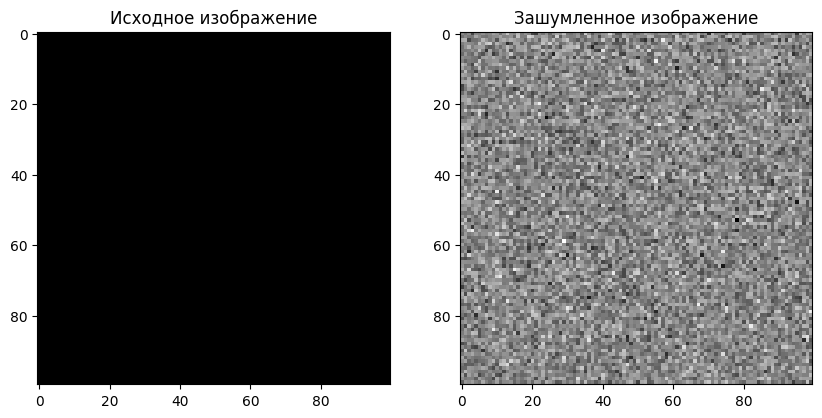

In [18]:
# Загружаем или создаем изображение (пример)
s = (100,100)
img = np.ones(s) * 255  # Пример случайного изображения
img = img.astype(np.uint8)

# Применяем шум
noisy_img = noise(img)

# Сравниваем исходное и зашумленное изображение
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('Исходное изображение')
plt.imshow(img, cmap='gray')

plt.subplot(1, 2, 2)
plt.title('Зашумленное изображение')
plt.imshow(noisy_img, cmap='gray')

plt.show()